1. Importing all of the necessary modules from the Keras and Python
packages:

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

2. Load and display the image that we want to classify

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  478k  100  478k    0     0  4105k      0 --:--:-- --:--:-- --:--:-- 4128k


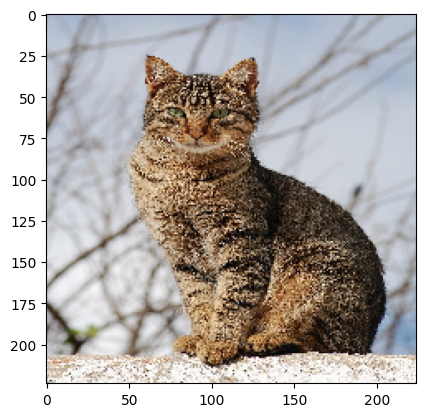

In [ ]:
!curl https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg --output cat.jpg
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

3. Increase the number of dimensions for the shape of this newly created batch

In [ ]:
img_array = image.img_to_array(img)
print("shape of original image: ", img_array.shape)

img_batch = np.expand_dims(img_array, axis=0)
print("shape of expanded image: ", img_batch.shape)

shape of original image:  (224, 224, 3)
shape of expanded image:  (1, 224, 224, 3)


4. **Normalization** (feature scaling). Scale the values of the pixel to the range [0,1] or [–1,1].

In [ ]:
img_preprocessed = preprocess_input(img_batch)
print(img_preprocessed)

[[[[ 70.061     43.221     30.32    ]
   [ 81.061     53.221     37.32    ]
   [ 93.061     64.221     45.32    ]
   ...
   [105.061     76.221     57.32    ]
   [105.061     76.221     57.32    ]
   [104.061     75.221     56.32    ]]

  [[ 70.061     43.221     30.32    ]
   [ 84.061     56.221     40.32    ]
   [ 94.061     65.221     46.32    ]
   ...
   [104.061     75.221     56.32    ]
   [104.061     75.221     56.32    ]
   [105.061     76.221     57.32    ]]

  [[ 72.061     49.221     32.32    ]
   [ 88.061     58.221     42.32    ]
   [ 97.061     67.221     51.32    ]
   ...
   [103.061     76.221     57.32    ]
   [105.061     76.221     57.32    ]
   [105.061     74.221     56.32    ]]

  ...

  [[ 44.060997  54.221     63.32    ]
   [132.061    125.221    125.32    ]
   [149.061    135.22101  131.32    ]
   ...
   [101.061     94.221     92.32    ]
   [118.061    111.221    109.32    ]
   [143.061    136.22101  131.32    ]]

  [[ 53.060997  52.221     57.32    ]
   [136

5. Load ResNet-50 model. (Convolutional Neural Network (CNN))

In [ ]:
model = tf.keras.applications.resnet50.ResNet50()
print(model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


5. Run the pretrained model on the image to get a list of category predictions and
their respective probabilities.

In [ ]:
prediction = model.predict(img_preprocessed)
print(prediction.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
(1, 1000)


6. Display a few of the highest probability categories.

In [ ]:
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.42130977), ('n02123045', 'tabby', 0.17263727), ('n02124075', 'Egyptian_cat', 0.10656932)]
